In [2]:
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12

In [3]:
url = 'https://www.shine.com/job-search/jobs?job_type=2&top_companies_boost=true&sort=1'
response = requests.get(url)
response

<Response [200]>

In [4]:
soup = BeautifulSoup(response.text,'html.parser')
html = soup.find_all('div')

In [5]:
req = soup.select('div h2[itemprop="name"]')
titles = [r.text for r in req]
titles[:5]


['Hiring for *HDFC ERGO*',
 'RELATIONSHIP MANAGER',
 'Hiring for *HDFC ERGO* Outbound (SALES PROCESS)',
 'Tele Sales Executive',
 'RELATIONSHIP MANAGER']

In [6]:
# Cleaning Up the job titles
titles1 = [t.replace("|","") for t in titles]
titles = [t.replace("  ", "") for t in titles1]
titles[:5]

['Hiring for *HDFC ERGO*',
 'RELATIONSHIP MANAGER',
 'Hiring for *HDFC ERGO* Outbound (SALES PROCESS)',
 'Tele Sales Executive',
 'RELATIONSHIP MANAGER']

In [7]:
orgs = soup.find_all('div', class_='jobCard_jobCard_cName__mYnow')
orgs1 = [o.text for o in orgs]
[o for o in orgs1][:5]

['Mars Consultancy Firm Hiring For HD...',
 'AVEGA BUSINESS SOLUTIONS PRIVATE LI...',
 'Mars Consultancy Firm Hiring For HD...',
 'MEDALLION JEWELLERS PRIVATE LIMITED',
 'AVEGA BUSINESS SOLUTIONS PRIVATE LI...']

In [8]:
# Splitting a string based on the given substring.

sub_str = "Hiring"
[o.split(sub_str)[0] for o in orgs1][:5]

['Mars Consultancy Firm ',
 'AVEGA BUSINESS SOLUTIONS PRIVATE LI...',
 'Mars Consultancy Firm ',
 'MEDALLION JEWELLERS PRIVATE LIMITED',
 'AVEGA BUSINESS SOLUTIONS PRIVATE LI...']

In [9]:
companies = [o.split(sub_str)[0] for o in orgs1]
companies[:5]

['Mars Consultancy Firm ',
 'AVEGA BUSINESS SOLUTIONS PRIVATE LI...',
 'Mars Consultancy Firm ',
 'MEDALLION JEWELLERS PRIVATE LIMITED',
 'AVEGA BUSINESS SOLUTIONS PRIVATE LI...']

In [10]:
loc = soup.find_all('div', class_='jobCard_jobCard_lists__fdnsc')
[l.text[10:] for l in loc]

['Mumbai City',
 'Chennai',
 'Navi Mumbai+2Thane, Mumbai City',
 'elhi',
 'angalore',
 'Chennai+2Pondicherry, Ambattur',
 'Lucknow',
 'Mumbai City',
 'Mumbai City',
 'Bangalore',
 'Delhi',
 'Ahmedabad',
 'Varanasi',
 'Noida',
 'Delhi',
 'Rajkot',
 'elhi',
 'Delhi',
 'elhi',
 'Rajahmundry+4Vijayawada, Hyderabad, Vishakhapatnam, Kakinada']

In [11]:
loc1 = [l.text[10:] for l in loc]
[l.replace("+", ",") for l in loc1][:5]

['Mumbai City',
 'Chennai',
 'Navi Mumbai,2Thane, Mumbai City',
 'elhi',
 'angalore']

In [12]:
loc2 = [l.replace("+", ",") for l in loc1]
pattern  = r'[0-9]'
strpattern = r'[a-z]'
[re.sub(pattern, '', l) for l in loc2][:5]

['Mumbai City',
 'Chennai',
 'Navi Mumbai,Thane, Mumbai City',
 'elhi',
 'angalore']

In [13]:
location = [re.sub(pattern, '', l) for l in loc2]
location[:5]

['Mumbai City',
 'Chennai',
 'Navi Mumbai,Thane, Mumbai City',
 'elhi',
 'angalore']

In [14]:
[l.text[:10] for l in loc][:5]

['0 to 5 Yrs', '0 to 2 Yrs', '0 to 5 Yrs', '0 to 1 YrD', '0 to 1 YrB']

In [15]:
experience = [l.text[:10] for l in loc]
experience[:5]

['0 to 5 Yrs', '0 to 2 Yrs', '0 to 5 Yrs', '0 to 1 YrD', '0 to 1 YrB']

In [16]:
vacancies = soup.find_all('ul', class_='jobCard_jobCard_jobDetail__jD82J')
[v.text.split("Positions")[0] for v in vacancies ][:10]

['Be an Early ApplicantRegular80 ',
 'Be an Early ApplicantRegular8 ',
 'Be an Early ApplicantRegular50 ',
 'Be an Early ApplicantRegular10 ',
 'Be an Early ApplicantRegular3 ',
 'Be an Early ApplicantRegular10 ',
 'Be an Early ApplicantRegular10 ',
 'Be an Early ApplicantRegular40 ',
 'Be an Early ApplicantRegular30 ',
 'Be an Early ApplicantRemote6 ']

In [17]:
[v.text.split("Positions")[0][-3:-1] for v in vacancies ][:10]

['80', 'r8', '50', '10', 'r3', '10', '10', '40', '30', 'e6']

In [18]:
vac = [v.text.split("Positions")[0][-3:] for v in vacancies ]
vac = [v.replace('la', '1') for v in vac]
vac = [re.sub(strpattern, '', l) for l in vac]
vacancies= [v.replace(' ','') for v in vac]
vacancies[:5]

['80', '8', '50', '10', '3']

In [19]:
df = pd.DataFrame({'Titles':titles, 'Firm Name': companies, 'Job Location':location, 'Experience':experience,
                   'Positions': vacancies})

In [20]:
df

,Titles,Firm Name,Job Location,Experience,Positions
0,Hiring for *HDFC ERGO*,Mars Consultancy Firm,Mumbai City,0 to 5 Yrs,80
1,RELATIONSHIP MANAGER,AVEGA BUSINESS SOLUTIONS PRIVATE LI...,Chennai,0 to 2 Yrs,8
2,Hiring for *HDFC ERGO* Outbound (SALES PROCESS),Mars Consultancy Firm,"Navi Mumbai,Thane, Mumbai City",0 to 5 Yrs,50
3,Tele Sales Executive,MEDALLION JEWELLERS PRIVATE LIMITED,elhi,0 to 1 YrD,10
4,RELATIONSHIP MANAGER,AVEGA BUSINESS SOLUTIONS PRIVATE LI...,angalore,0 to 1 YrB,3
5,Sales Executive,Jobs Territory,"Chennai,Pondicherry, Ambattur",0 to 4 Yrs,10
6,Branch Banking,Reliable HR Consultancy,Lucknow,1 to 6 Yrs,10
7,Sales Representative,Mars Consultancy Firm,Mumbai City,0 to 2 Yrs,40
8,Sales Representative,Mars Consultancy Firm,Mumbai City,0 to 2 Yrs,30
9,Selenium Testers,Sunil Kumar,Bangalore,3 to 8 Yrs,6


In [21]:
df['Titles'].duplicated().sum()

3

In [22]:
df = df.drop_duplicates(subset=['Titles'])

In [23]:
df

,Titles,Firm Name,Job Location,Experience,Positions
0,Hiring for *HDFC ERGO*,Mars Consultancy Firm,Mumbai City,0 to 5 Yrs,80
1,RELATIONSHIP MANAGER,AVEGA BUSINESS SOLUTIONS PRIVATE LI...,Chennai,0 to 2 Yrs,8
2,Hiring for *HDFC ERGO* Outbound (SALES PROCESS),Mars Consultancy Firm,"Navi Mumbai,Thane, Mumbai City",0 to 5 Yrs,50
3,Tele Sales Executive,MEDALLION JEWELLERS PRIVATE LIMITED,elhi,0 to 1 YrD,10
5,Sales Executive,Jobs Territory,"Chennai,Pondicherry, Ambattur",0 to 4 Yrs,10
6,Branch Banking,Reliable HR Consultancy,Lucknow,1 to 6 Yrs,10
7,Sales Representative,Mars Consultancy Firm,Mumbai City,0 to 2 Yrs,40
9,Selenium Testers,Sunil Kumar,Bangalore,3 to 8 Yrs,6
10,Aditya Birla Sun Life Insurance Walk in Drive_...,ADITYA BIRLA SUN LIFE INSURANCE COM...,Delhi,1 to 6 Yrs,10
11,Hr Recruiter,Evoke HR Solutions Pvt. Ltd.,Ahmedabad,0 to 3 Yrs,1


In [24]:
#Changing Dtype
df['Positions'] = df['Positions'].astype('int32')
#Creating a New Column
numpattern = r'[0]'
df['Category'] = ['Fresher' if '0' in i else 'Experienced' for i in df['Experience']]

In [25]:
#DataFrame created based on Descending values 
df.sort_values(by='Positions', ascending=False)

,Titles,Firm Name,Job Location,Experience,Positions,Category
0,Hiring for *HDFC ERGO*,Mars Consultancy Firm,Mumbai City,0 to 5 Yrs,80,Fresher
2,Hiring for *HDFC ERGO* Outbound (SALES PROCESS),Mars Consultancy Firm,"Navi Mumbai,Thane, Mumbai City",0 to 5 Yrs,50,Fresher
19,Banking Officer,Tricolour Manpower Solutions LLP,"Rajahmundry,Vijayawada, Hyderabad, Vishakhapat...",0 to 4 Yrs,50,Fresher
7,Sales Representative,Mars Consultancy Firm,Mumbai City,0 to 2 Yrs,40,Fresher
13,Business Development Executive,Talent Warrior HR Solution,Noida,1 to 6 Yrs,30,Experienced
16,Education Counsellor,Shivam Enterprises.,elhi,0 to 1 YrD,25,Fresher
3,Tele Sales Executive,MEDALLION JEWELLERS PRIVATE LIMITED,elhi,0 to 1 YrD,10,Fresher
5,Sales Executive,Jobs Territory,"Chennai,Pondicherry, Ambattur",0 to 4 Yrs,10,Fresher
6,Branch Banking,Reliable HR Consultancy,Lucknow,1 to 6 Yrs,10,Experienced
12,Relationship Manager,ADITYA BIRLA SUN LIFE INSURANCE COM...,Varanasi,1 to 6 Yrs,10,Experienced


In [26]:
TITLES = []
COMPANIES = []
LOCATIONS = []
EXPERIENCE = []
VACANCIES = []

for i in range(1,6):
    link = f'https://www.shine.com/job-search/jobs-{i}?job_type=2&top_companies_boost=true&sort=1'
    response = requests.get(link)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        req = soup.select('div h2[itemprop="name"]')
        titles = [r.text for r in req]
        titles1 = [t.replace("|","") for t in titles]
        titles = [t.replace("  ", "") for t in titles1]
        TITLES.extend(titles)
        
        orgs = soup.find_all('div', class_='jobCard_jobCard_cName__mYnow')
        orgs1 = [o.text for o in orgs]
        sub_str = "Hiring"
        companies = [o.split(sub_str)[0] for o in orgs1]
        COMPANIES.extend(companies) 
        
        loc = soup.find_all('div', class_='jobCard_jobCard_lists__fdnsc')
        loc1 = [l.text[10:] for l in loc]
        loc2 = [l.replace("+", ",") for l in loc1]
        pattern  = r'[0-9]'
        strpattern = r'[a-z]'
        location = [re.sub(pattern, '', l) for l in loc2]
        LOCATIONS.extend(location)
        
        experience = [l.text[:10] for l in loc]
        EXPERIENCE.extend(experience)  
        
        vacancies = soup.find_all('ul', class_='jobCard_jobCard_jobDetail__jD82J')
        vac = [v.text.split("Positions")[0][-3:] for v in vacancies ]
        vac = [v.replace('la', '1') for v in vac]
        vac = [re.sub(strpattern, '', l) for l in vac]
        vacancies= [v.replace(' ','') for v in vac]
        VACANCIES.extend(vacancies)
        
    else:
        print('Invalid Response')

df = pd.DataFrame({'Job Title': TITLES, 
                   'Employer': COMPANIES,
                   'Job Location': LOCATIONS, 
                   'Experience': EXPERIENCE, 
                   'Positions': VACANCIES})

In [27]:
df

,Job Title,Employer,Job Location,Experience,Positions
0,Hiring for *HDFC ERGO*,Mars Consultancy Firm,Mumbai City,0 to 5 Yrs,80
1,RELATIONSHIP MANAGER,AVEGA BUSINESS SOLUTIONS PRIVATE LI...,Chennai,0 to 2 Yrs,8
2,Hiring for *HDFC ERGO* Outbound (SALES PROCESS),Mars Consultancy Firm,"Navi Mumbai,Thane, Mumbai City",0 to 5 Yrs,50
3,Tele Sales Executive,MEDALLION JEWELLERS PRIVATE LIMITED,elhi,0 to 1 YrD,10
4,RELATIONSHIP MANAGER,AVEGA BUSINESS SOLUTIONS PRIVATE LI...,angalore,0 to 1 YrB,3
...,...,...,...,...,...
69,HTML and PHP Website Developer,Narendra Sharma,"ur,Bangalore, Kanpur, Lucknow, Pune",0 YrsSitap,5
70,Sales Executive,TRAIDENT BRAINS PRIVATE LIMITED,Mohali,0 to 2 Yrs,20
71,Agency Development Manager,Times Consultancy Services,Udaipur,1 to 6 Yrs,99
72,Import Export Executive,Qatar Manpower Agency,Delhi,0 to 2 Yrs,2


In [28]:
df = df.drop_duplicates(subset=['Job Title'])

In [29]:
#converting the column to numeric datatype
df.Positions = pd.to_numeric(df.Positions)

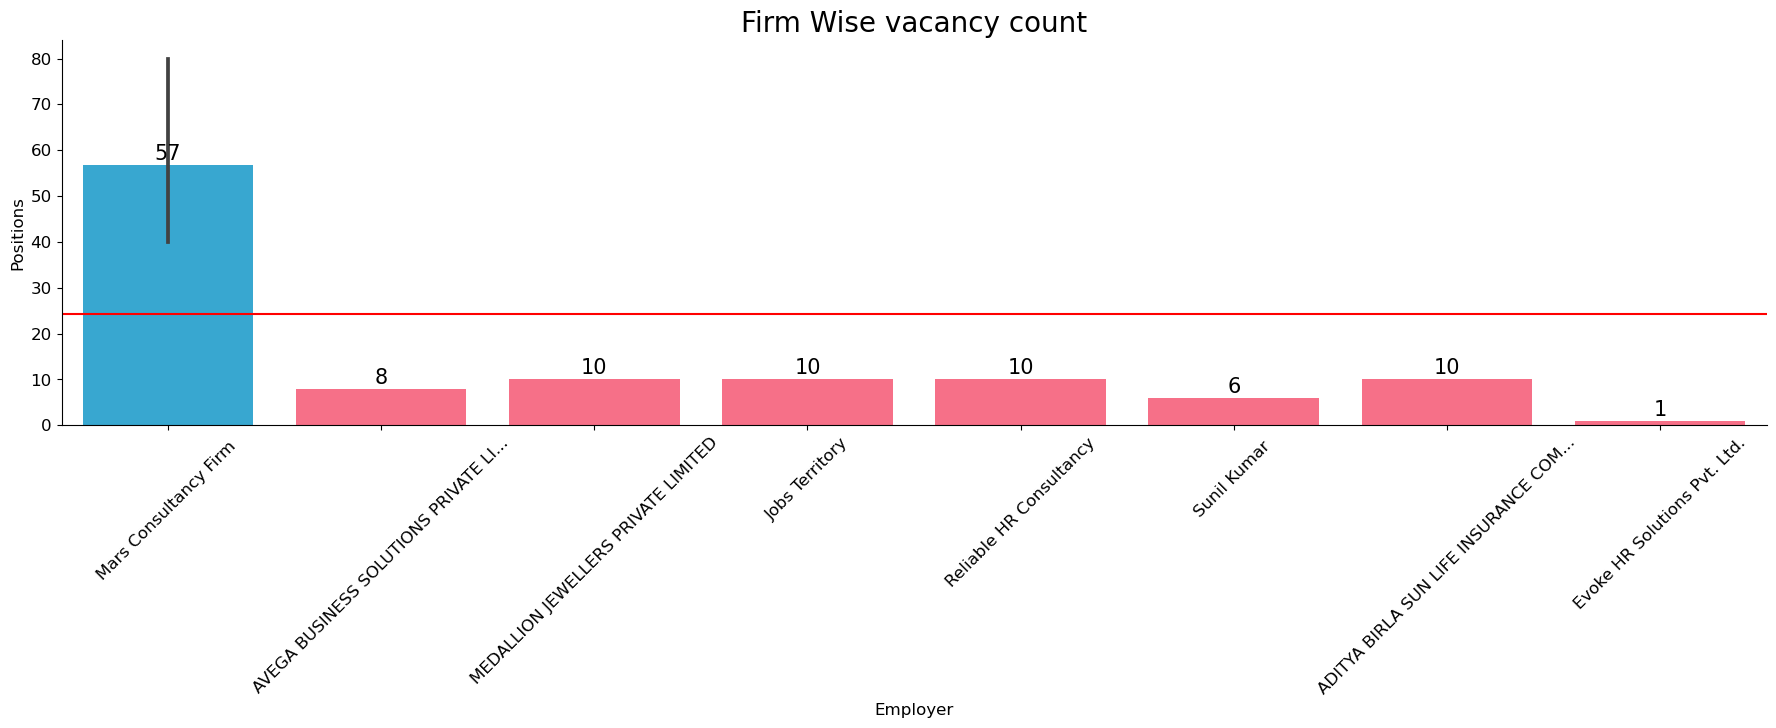

In [39]:
plt.figure(figsize=(22,5), dpi=100)
ax = sns.barplot(x=df['Employer'][:10], y=df['Positions'][:10])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Firm Wise vacancy count', fontsize=20)
plt.axhline(df.Positions.mean(), color='red')

#Annotating each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

#coloring each bar based on a condition if the bar value is greator or less than count of positions for a given firm 
for i in range(len(ax.patches)):
    #getting the count of each bar
    counts = [p.get_height() for p in ax.patches]
    #getting the colors based on the condition for each bar
    colors = ['#38A7D0' if j > df.Positions.mean() else '#F67088' for j in counts]
    #passing the color for each bar
    ax.patches[i].set_facecolor(colors[i])  
    
plt.xticks(rotation=45)
plt.show()

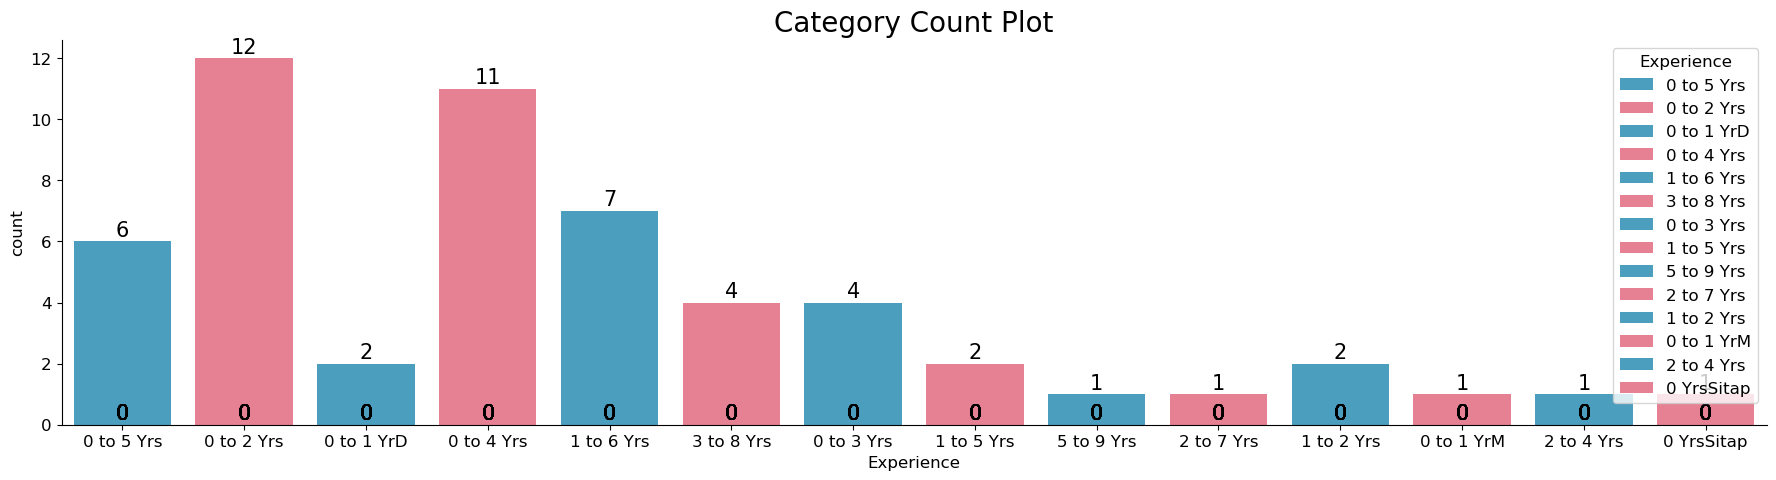

In [31]:
palette = ['#38A7D0', '#F67088']
plt.figure(figsize=(22,5), dpi=100)
ax = sns.countplot(data =df,x=df['Experience'][:69], hue=df['Experience'][:69], dodge=False, palette=palette)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Category Count Plot', fontsize=20)
plt.show()

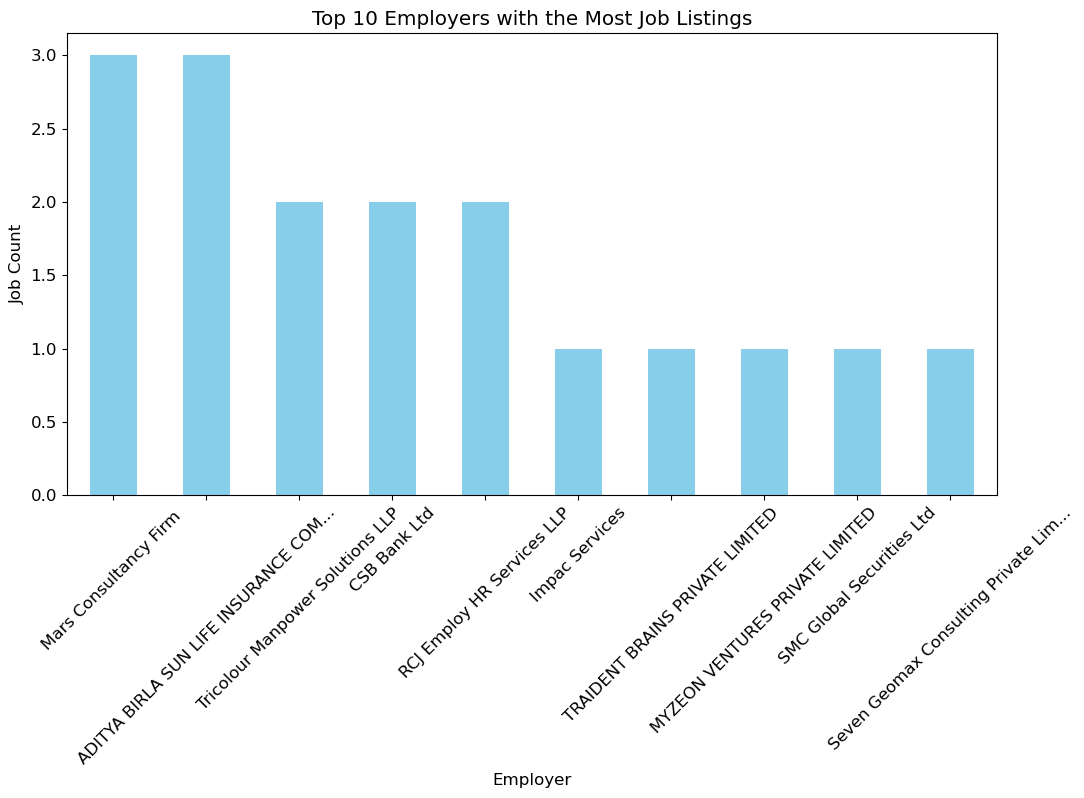

In [32]:
# Group data by employer and count job listings
employer_counts = df['Employer'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
employer_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Employer')
plt.ylabel('Job Count')
plt.title('Top 10 Employers with the Most Job Listings')
plt.xticks(rotation=45)
plt.show()

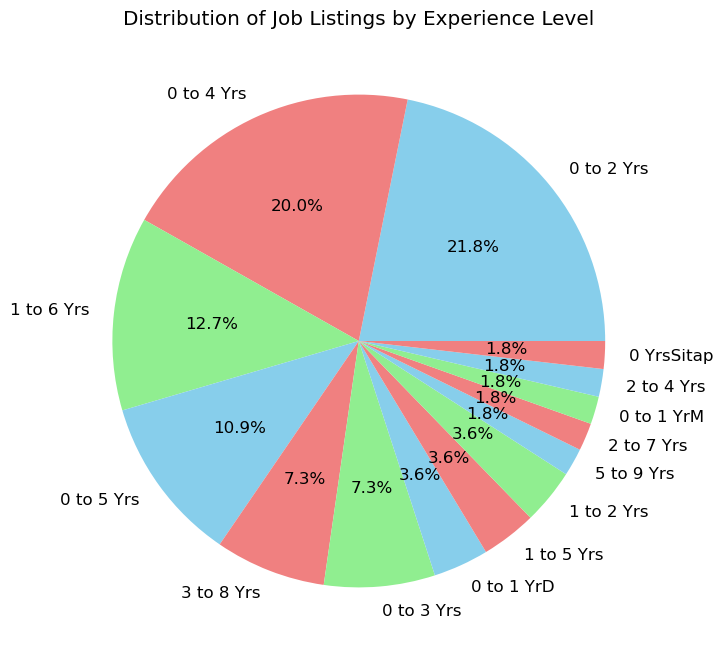

In [33]:
# Group data by experience level and count job listings
experience_counts = df['Experience'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
experience_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylabel('')
plt.title('Distribution of Job Listings by Experience Level')
plt.show()

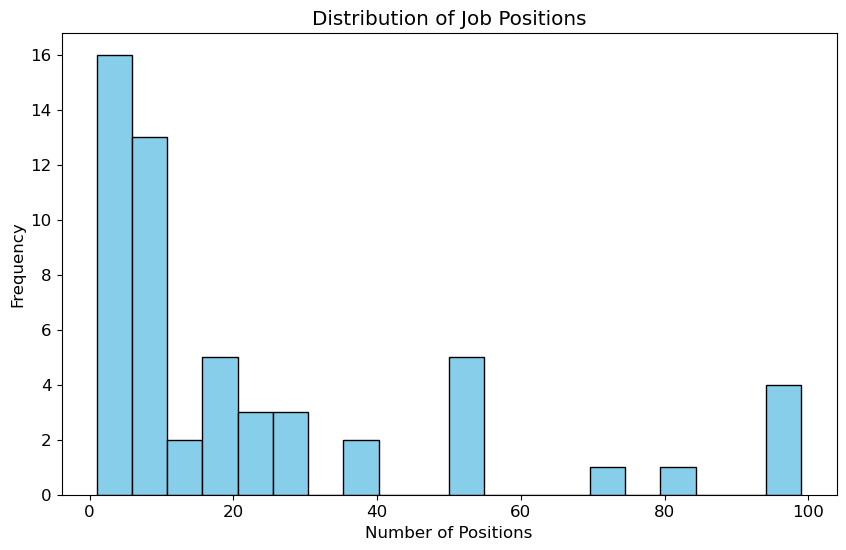

In [34]:
# Convert Positions column to numeric
df['Positions'] = pd.to_numeric(df['Positions'], errors='coerce')

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Positions'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Positions')
plt.ylabel('Frequency')
plt.title('Distribution of Job Positions')
plt.show()

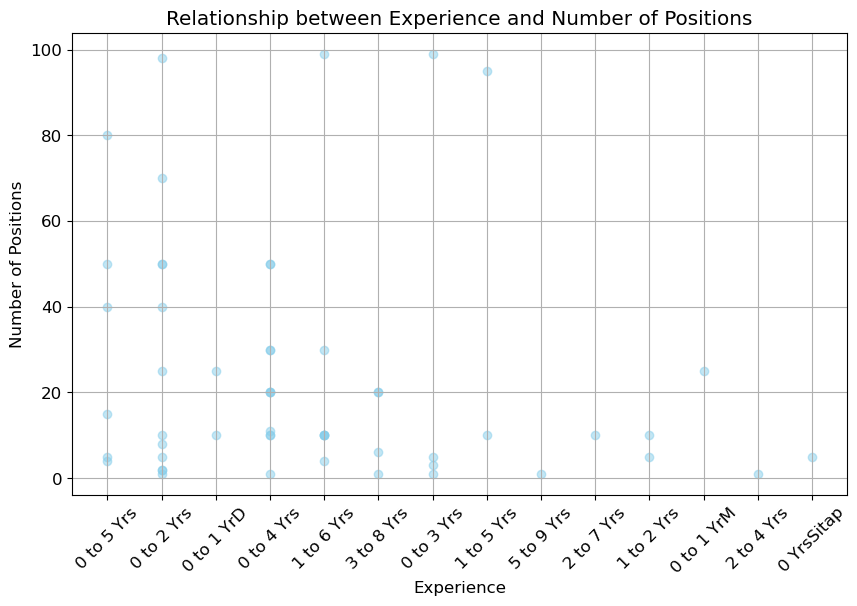

In [35]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Experience'], df['Positions'], alpha=0.5, color='skyblue')
plt.xlabel('Experience')
plt.ylabel('Number of Positions')
plt.title('Relationship between Experience and Number of Positions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

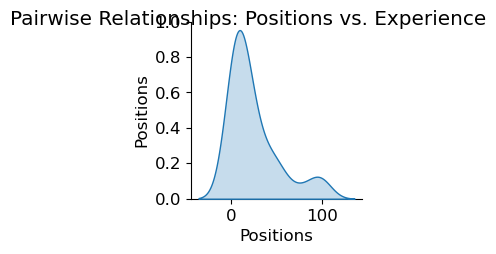

In [40]:
# Create a pair plot
sns.pairplot(df[['Positions', 'Experience']], diag_kind='kde', palette='pastel')
plt.suptitle('Pairwise Relationships: Positions vs. Experience')
plt.show()

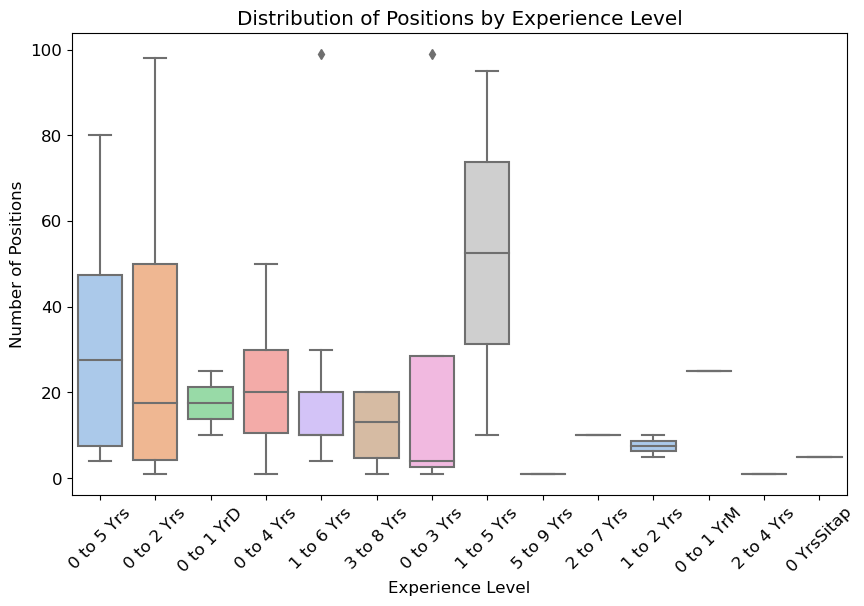

In [37]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience', y='Positions', data=df, palette='pastel')
plt.xlabel('Experience Level')
plt.ylabel('Number of Positions')
plt.title('Distribution of Positions by Experience Level')
plt.xticks(rotation=45)
plt.show()